In [1]:
push!(LOAD_PATH, "./GannSwing/src")
using GannSwing

┌ Info: Recompiling stale cache file /home/fxb/.julia/compiled/v1.0/GannSwing.ji for GannSwing [top-level]
└ @ Base loading.jl:1190


In [3]:
gann_obj=GannSwingObj(2)

GannSwingObj(2, 1, GannSwing.BarInfo[])

In [4]:
using MarketData
using Plots
gr()

ta1=AAPL[:Open,:High,:Low,:Close][7900:8075]
sz=length(ta1)
y=OHLC[]
x=Int[]
for i in 1:sz
    push!(x,i)
    push!(y,OHLC(values(ta1[:Open][i])[1],
                 values(ta1[:High][i])[1],
                 values(ta1[:Low][i])[1],
                 values(ta1[:Close][i])[1]))
end
length(y)


176

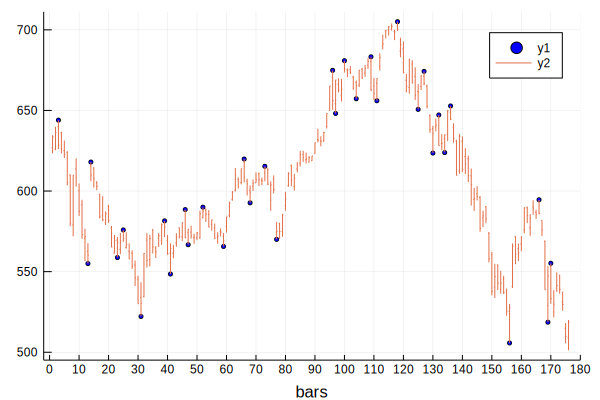

In [5]:
g_y=Float64[]
g_x=Int[]

for i in 1:sz
   (dir,_x,_y) = calculate(gann_obj,ta1,i)
    append!(g_x,_x)
    append!(g_y,_y)
end


Plots.scatter(g_x,g_y,markersize=2, c=:blue,xaxis=("bars", (-2, 180), 0:10:180))
Plots.ohlc!(x,y)